<a href="https://colab.research.google.com/github/lfr4704/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/LR_LS_DS_Unit_4_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** `An individual node of a neural network. It takes in a combination of inputs and weights, multiplies them together, adds a bias term, and then passes the result through an activation function. The result of this process is what the neuron will pass onto the subsequent layer. Neural Network nodes are modeled after the neurons in the human brain. They have a activation function that decides how much signal to pass onto other neurons. In the human brain there is an electrochemical threshold that decides when and when not to fire.`
- **Input Layer:** `The first layer of nodes of in a neural network. This layer receives values from our dataset and combines them with the weights and biases. This is the only layer of the network that our raw input value interact with directly`
- **Hidden Layer:**`The middle layers of a neural network that are not the input layer or output layer. These nodes perform the same operations as all others, but are not directly accessible during training. Having multiple hidden layers in a neural network architecture is what determines the designation of "Deep Learning."`
- **Output Layer:**`The final layer of our neural network, the output layer outputs our model's final predictions. For regression problems this is a single node that outputs a continuous value. For binary classification, it is a single node that outputs a probability between 0 & 1, and for multi-class implementations the output layer typically includes a node for each of the classes that we are trying to predicts`
- **Activation Function:**`Activation functions express how strongly or weakly signal should be passed to the next layer given the weighted sum of the previous input + a bias term. The resulting output is usually referred to as an 'activation'`

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

### It is an algorithm for supervised leanring for artificial neural networks that uses gradient decent. This tunes the input data by updating the weights based on the error until you get closer to your desired result (reducing error).

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

In [60]:
# Your Answer Here - Change the Cell to Markdown

The input data in the neural network is transformed before passed to a hidden layer by an applied weight that is is improved or gets closer with every iteration an an added bias that shifts the data to a closer fit. An activation function is then applied to the sum of the weighted/transfored data and it defines the output nodes. After the model has completed the trainig(learning process) with the input data on a single or multiple layer, a prediction is sent to the output layer. 

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [61]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [62]:
X.shape, y.shape

((300, 2), (300,))

In [63]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [64]:
X

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502],
       [ 0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826],
       [ 0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ],
       [ 0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567],
       [ 0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252],
       [-0.88778575, -1.98079647],
       [-0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985],
       [-0.38732682, -0.30230275],
       [-1.04855297, -1.42001794],
       [-1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 ],
       [-1.25279536,  0.77749036],
       [-1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218],
       [-0.02818223,  0.42833187],
       [ 0.06651722,

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential()
model1.add(Dense(1, input_shape=(X.shape[1],), activation='sigmoid')) #sigmoid is used for categorical classifications of 0 and 1

model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [91]:
model1.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [92]:
h1 = model1.fit(X, y, batch_size=32, epochs=80)

Epoch 1/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7342 - accuracy: 0.4933
Epoch 2/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7321 - accuracy: 0.4933
Epoch 3/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7298 - accuracy: 0.4933
Epoch 4/80
10/10 [==============================] - 0s 4ms/step - loss: 0.7279 - accuracy: 0.5000
Epoch 5/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7260 - accuracy: 0.5000
Epoch 6/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7242 - accuracy: 0.4967
Epoch 7/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7224 - accuracy: 0.4967
Epoch 8/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.4967
Epoch 9/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.4933
Epoch 10/80
10/10 [==============================] - 0s 3ms/step - loss: 0.7174 - accuracy: 0.4900
Epoch 11/80
10/10 [

In [93]:
scores = model1.evaluate(X, y)
scores

10/10 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.6233


[0.6873733401298523, 0.6233333349227905]

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [94]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [ ]:
#another option of how to instantiate model

# model2 = Sequential([
#     Dense(32, input_dim=2, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

In [96]:
model2 = Sequential()
model2.add(Dense(32, input_dim=2, activation='relu'))
model2.add(Dense(32, activation='relu')) 
model2.add(Dense(1, activation='sigmoid')) # if this was a multiclass classification the activation utilized on the output layer should be a softmax


model2.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [98]:
h2 = model2.fit(X, y, callbacks=[myCallback()], epochs=100)


Epoch 1/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1156 - accuracy: 0.9933
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9967
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1095 - accuracy: 0.9933
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9933
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9900
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9967
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9900
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0976 - accuracy: 0.9967
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0955 - accuracy: 0.9900
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0934 - accuracy: 0.9967
Epoch 11/

In [99]:
scores2 = model2.evaluate(X, y)
scores2

10/10 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9967


[0.04572189599275589, 0.996666669845581]

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [73]:
pip install mlxtend 

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


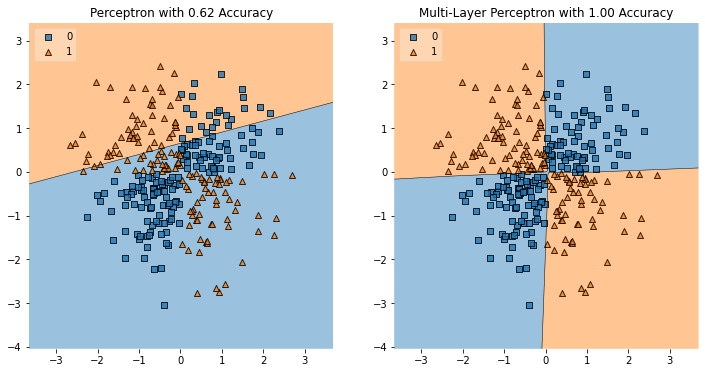

In [100]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

In [ ]:
# Your Answer Here - Change the Cell to Markdown

### A simple perceptron can only learn a linear decision boundary as seen in the visualization above. The additional layers and neurons allow a neural networks to learn non-linear relationships such as the XOR dataset displayed above. Additional layers (more so than additional neurons) will help Neural Networks learn the highly non-linear relationships present in data such as images. This property is the touted benefit of "deep learning".

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [101]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0


In [102]:
#create train,test data
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8, test_size=0.2, stratify=df['target'], random_state=42)
train.shape, test.shape

((242, 14), (61, 14))

In [103]:
#baseline prediction without training
train['target'].value_counts(normalize=True)

1    0.545455
0    0.454545
Name: target, dtype: float64

In [104]:
X_train = df.iloc[:,:-1]
X_test = df.iloc[:,:-1]

In [105]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2


In [106]:
y_train=df['target']
y_test=df['target']

In [107]:
y_train

14     1
292    0
79     1
9      1
212    0
      ..
42     1
59     1
249    0
142    1
105    1
Name: target, Length: 303, dtype: int64

In [108]:
#normailize data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
#alternately the code above coul be passed as

# y = df.target.values
# X = df.drop('target', axis='column').values
# scaler = StandardScaler()
# X.scaler.fit_transform(X)
# print(X.shape)
# print(X)
# print(y.shape)
# print(y)

In [110]:
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Function to create model, required for KerasClassifier
def create_model(lr):
  adam = Adam(learning_rate=lr)
  model = Sequential()
  model.add(Dense(32, input_dim = 13, activation ='relu'))
  model.add(Dense(16, activation ='relu'))
  model.add(Dense(1, activation = "sigmoid"))

  #compile model
  model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

  return model

In [ ]:
#create model
hyper_model = KerasClassifier(build_fn =create_model, verbose=0)

In [111]:
#add hyper parameters tunning/ define the grid search parameter
param_grid = {
    'lr': [.001, .01, .1],
    'batch_size': [10,20,40,60,80,100],
    'epochs': [20,50,100]}

In [112]:
#param distributions for random search
rand = RandomizedSearchCV(estimator=hyper_model, param_distributions=param_grid, n_jobs=-1)

In [113]:
rand_result= rand.fit(X_train,y_train)

In [114]:
# Report Results
print(f"Best: {rand_result.best_score_} using {rand_result.best_params_}")
search = rand_result.best_params_
means = rand_result.cv_results_['mean_test_score']
stds = rand_result.cv_results_['std_test_score']
params = rand_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8446994543075561 using {'lr': 0.1, 'epochs': 50, 'batch_size': 20}
Means: 0.8414207577705384, Stdev: 0.05019285634322294 with: {'lr': 0.1, 'epochs': 50, 'batch_size': 10}
Means: 0.7952458977699279, Stdev: 0.025818491696327692 with: {'lr': 0.1, 'epochs': 50, 'batch_size': 80}
Means: 0.798633873462677, Stdev: 0.04098578688601421 with: {'lr': 0.01, 'epochs': 20, 'batch_size': 80}
Means: 0.8380874395370483, Stdev: 0.03303078271147762 with: {'lr': 0.01, 'epochs': 20, 'batch_size': 10}
Means: 0.8446994543075561, Stdev: 0.03168860137938985 with: {'lr': 0.1, 'epochs': 50, 'batch_size': 20}
Means: 0.8315300583839417, Stdev: 0.04398332432160797 with: {'lr': 0.001, 'epochs': 50, 'batch_size': 100}
Means: 0.7788524627685547, Stdev: 0.05559383088015228 with: {'lr': 0.01, 'epochs': 20, 'batch_size': 100}
Means: 0.8380874276161194, Stdev: 0.03633843157742851 with: {'lr': 0.001, 'epochs': 20, 'batch_size': 10}
Means: 0.8183606505393982, Stdev: 0.0303317628632556 with: {'lr': 0.1, 'epochs': 50,

In [115]:
from sklearn.metrics import accuracy_score

In [116]:
#make a prediction with the test dataset
final_results = rand_result.best_estimator_.predict(X_test)

In [117]:
#compute the score
accuracy_score(final_results, y_test)

0.900990099009901